In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [12]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [13]:
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names
target_names = wine_data.target_names

In [14]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map(lambda i: target_names[i])

print("--- Data Overview ---")
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
df.info()
print("\nStatistical Summary:")
print(df.describe())
print("\nChecking for missing values:")
print(df.isnull().sum().sum(), "missing values found.")

--- Data Overview ---
Shape of the dataset: (178, 15)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.


--- Starting Exploratory Data Analysis ---


/tmp/ipython-input-4247522403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_name', data=df, palette='viridis')


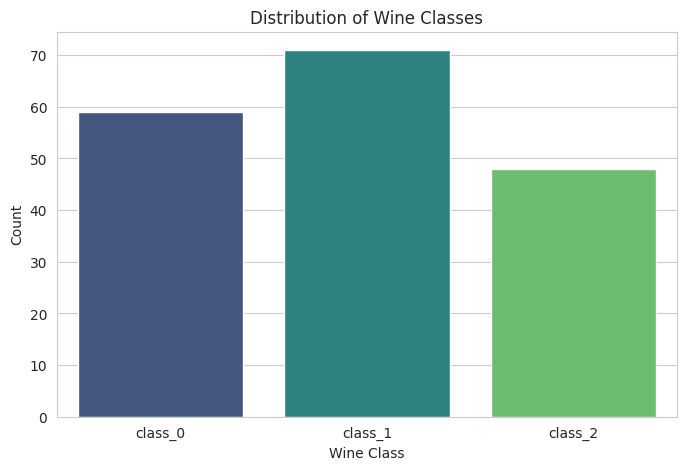


Plotting feature distributions...


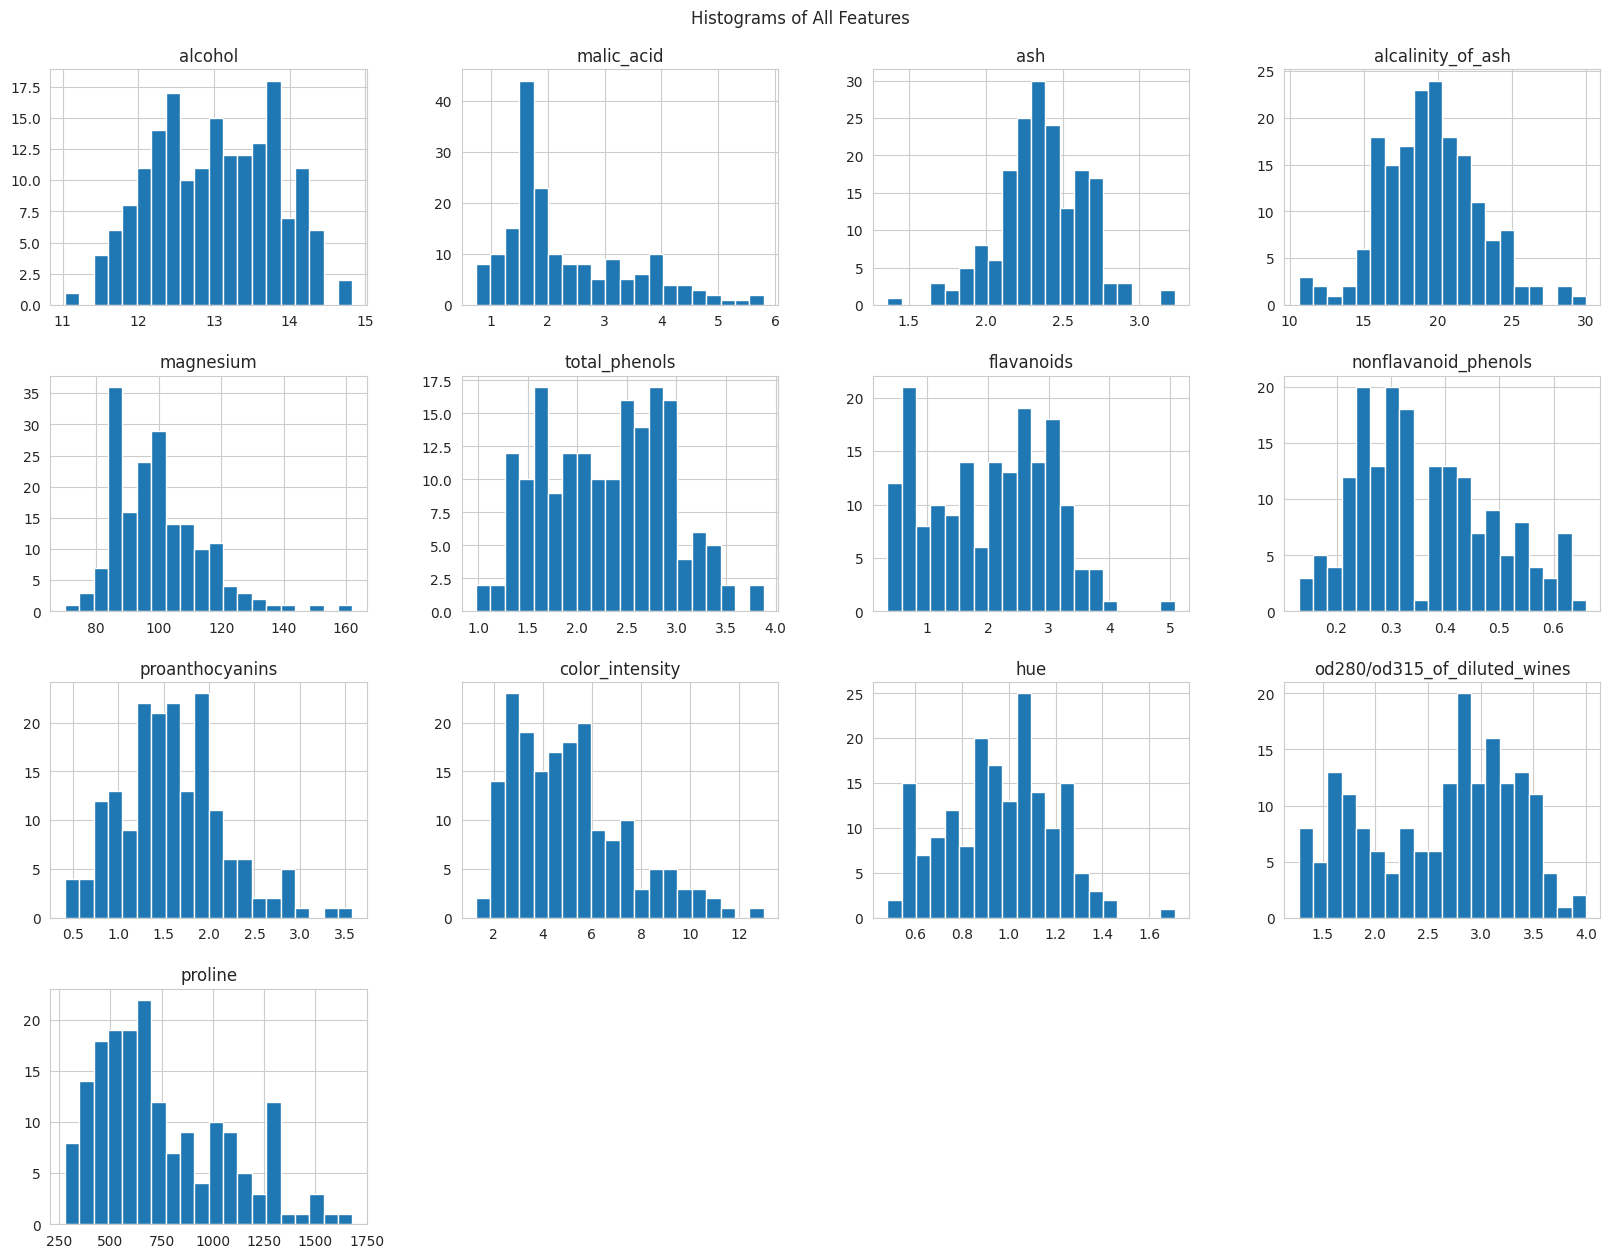


Plotting feature correlation heatmap...


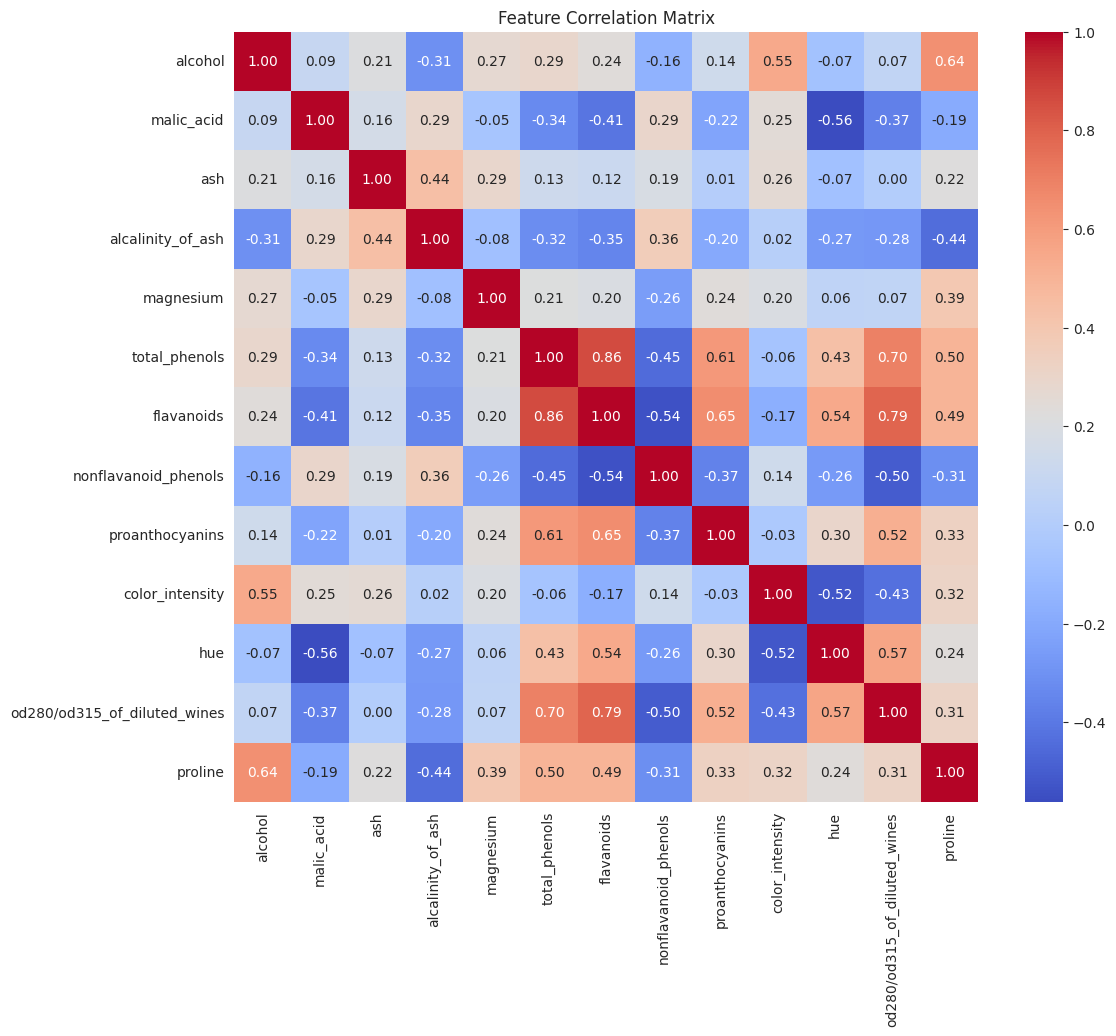


Plotting feature distributions per class...


/tmp/ipython-input-4247522403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_name', y=feature, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-4247522403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_name', y=feature, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-4247522403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_name', y=feature, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-4247522403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` i

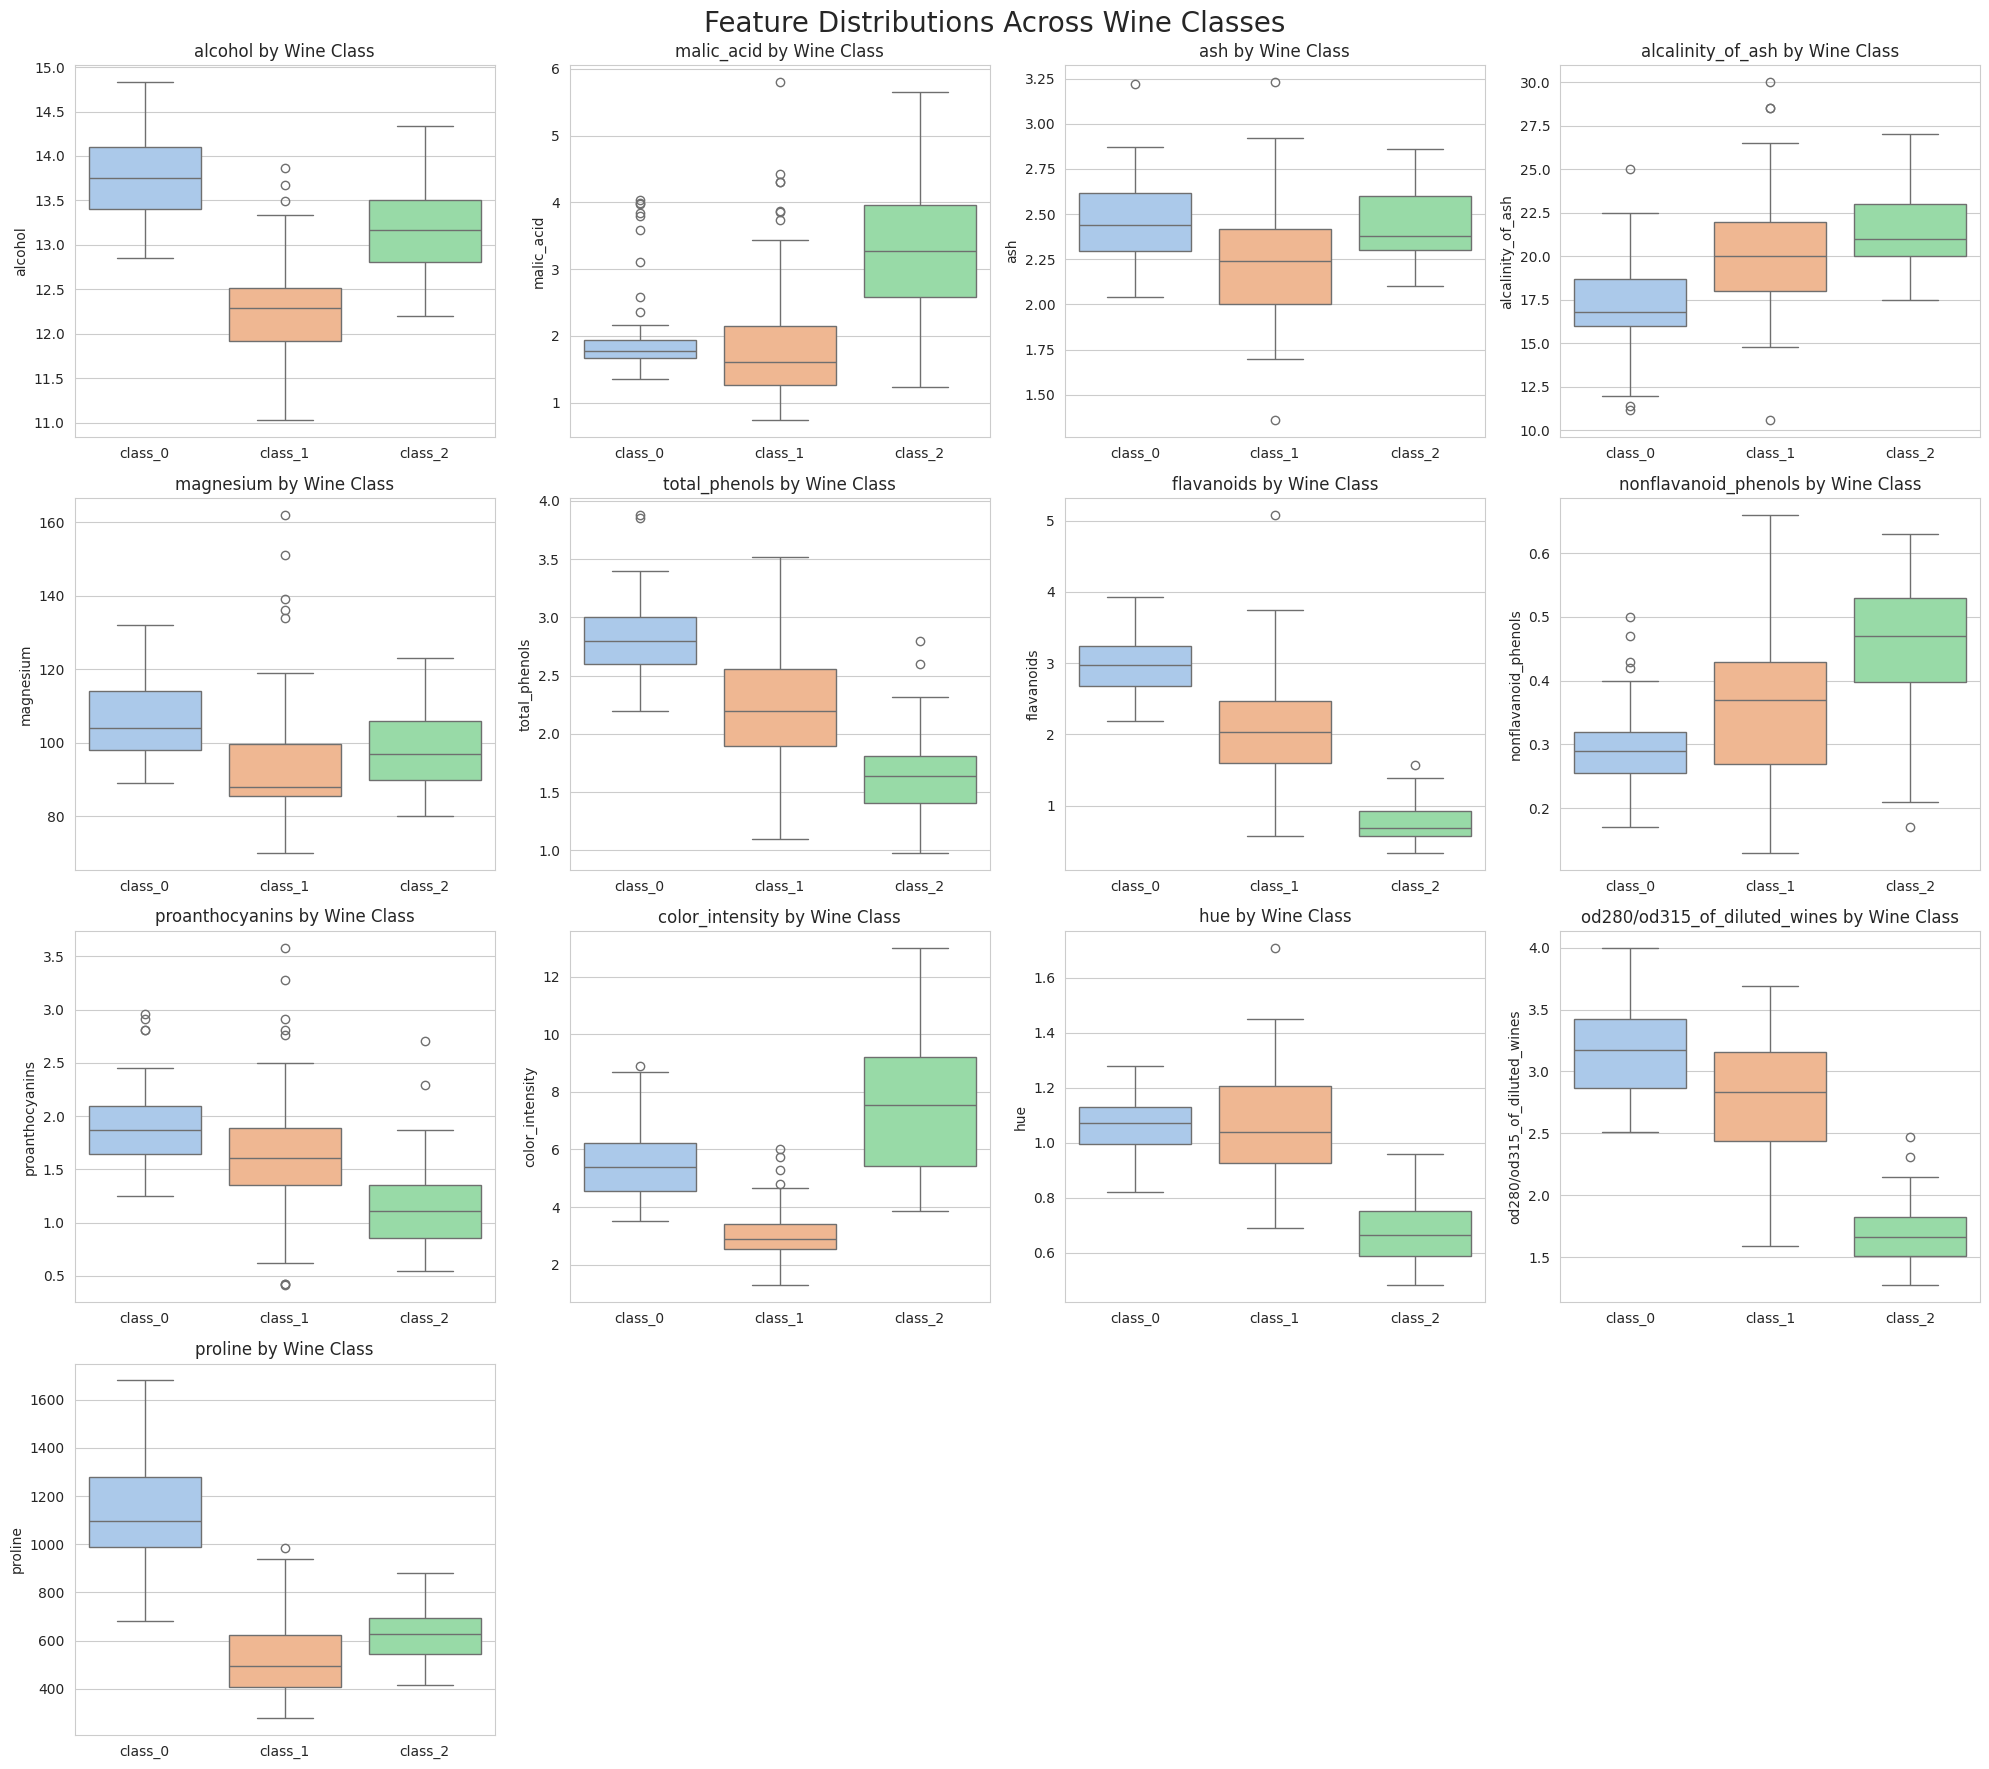

In [15]:
print("\n--- Starting Exploratory Data Analysis ---")

# a) Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target_name', data=df, palette='viridis')
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

# b) Feature Distributions
print("\nPlotting feature distributions...")
df.drop(['target', 'target_name'], axis=1).hist(bins=20, figsize=(20, 15), layout=(4, 4))
plt.suptitle('Histograms of All Features', y=0.92)
plt.show()

# c) Correlation Heatmap
print("\nPlotting feature correlation heatmap...")
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(['target', 'target_name'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# d) Feature vs. Target Analysis (Box Plots)
print("\nPlotting feature distributions per class...")
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 18))
axes = axes.flatten()
for i in range(len(feature_names), len(axes)):
    fig.delaxes(axes[i])

for i, feature in enumerate(feature_names):
    sns.boxplot(x='target_name', y=feature, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{feature} by Wine Class')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Feature Distributions Across Wine Classes', fontsize=20)
plt.show()

In [16]:

print("\n--- Starting Feature Engineering & Preprocessing ---")

df['phenols_to_flavanoids_ratio'] = df['total_phenols'] / df['flavanoids']
df['phenols_to_flavanoids_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
df['phenols_to_flavanoids_ratio'].fillna(0, inplace=True)

print("New feature 'phenols_to_flavanoids_ratio' created.")
print(df[['total_phenols', 'flavanoids', 'phenols_to_flavanoids_ratio']].head())

X_engineered = df.drop(['target', 'target_name'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures have been scaled using StandardScaler.")


--- Starting Feature Engineering & Preprocessing ---
New feature 'phenols_to_flavanoids_ratio' created.
   total_phenols  flavanoids  phenols_to_flavanoids_ratio
0           2.80        3.06                     0.915033
1           2.65        2.76                     0.960145
2           2.80        3.24                     0.864198
3           3.85        3.49                     1.103152
4           2.80        2.69                     1.040892

Training set size: 142 samples
Test set size: 36 samples

Features have been scaled using StandardScaler.


/tmp/ipython-input-380996248.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['phenols_to_flavanoids_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
/tmp/ipython-input-380996248.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [17]:
print("\n--- Training SVM Model with Hyperparameter Tuning ---")

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    refit=True,
    verbose=2,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)
best_svm_model = grid_search.best_estimator_


--- Training SVM Model with Hyperparameter Tuning ---
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found by GridSearchCV:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}



--- Evaluating the Final Model on the Test Set ---
Accuracy on Test Set: 97.22%

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Plotting Confusion Matrix...


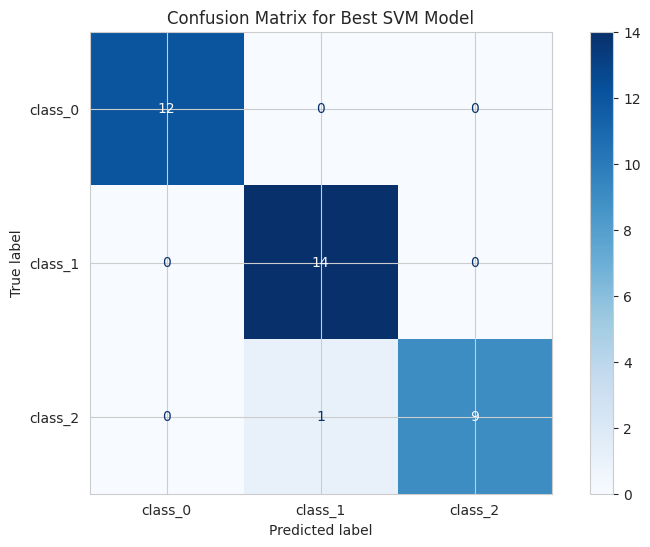

In [18]:


print("\n--- Evaluating the Final Model on the Test Set ---")

y_pred = best_svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Plotting Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best SVM Model')
plt.show()



--- Visualizing Decision Boundary in 2D using PCA ---


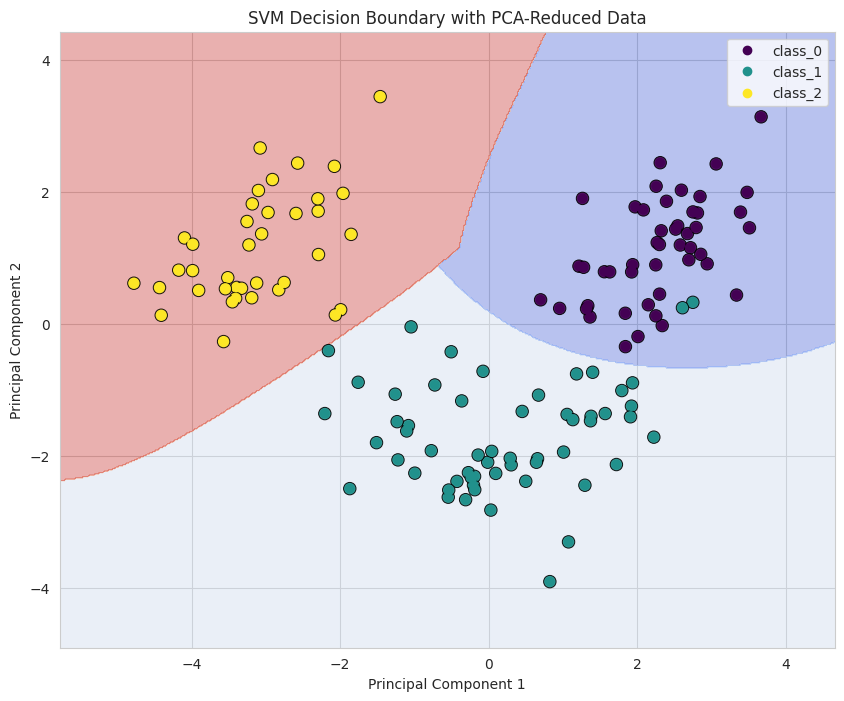

In [20]:

print("\n--- Visualizing Decision Boundary in 2D using PCA ---")

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_pca = SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], random_state=42)
svm_pca.fit(X_train_pca, y_train)

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train,
                palette='viridis', s=80, edgecolor='k', alpha=0.9)
plt.title('SVM Decision Boundary with PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis').legend_elements()[0], labels=list(target_names))
plt.show()
